# ESTUDIOS DE ESTACIONALIDAD

Estudio de estacionalidad por períodos para determinar patrones en los rendimientos de activos de renta variable o índices y operarlos en forma razonable.

### INDICE DE FUNCIONES:

- rends_mensuales(ticker, tipo, tipoacum, interval, period = None, data_from = None, data_to = None): retorna un dataframe y un gráfico con los rendimientos acumulados o promedio (según parámetro) mensuales para visualizar estacionalidad.

- rends_anuales(ticker, tipo, interval, period = None, data_from = None, data_to = None): retorna un dataframe y un gráfico con los rendimientos acumulados anuales para visualizar estacionalidad.

- meses_favorables(ticker, tipo, tipoacum, interval, period = None, data_from = None, data_to = None): retorna los meses de mejor rendimiento acumulado o de promedio diario. Análogo a rends_mensuales, pero ordenado en forma descendente y tabulado.

- heatmap_estacional(ticker, tipo, interval, period = None, data_from = None, data_to = None): es un heatmap de rendimientos mensuales para varios años (todo parametrizable) en colores de modo de visualizar estacionalidades.

In [2]:
# FUNCIONES PARA OBTENER INFORMACIÓN FINANCIERA

import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import time

def getDataYf(ticker, tipo, interval, data_from = None, data_to = None, period = None):
    """
    Es una función para descargar market data de Yahoo Finance con la librería yfinance.
    
    ## Inputs:
        >ticker: el nombre del ticker.
        >tipo: si es "no end" no se indica hasta cuándo (data_to), se obtiene hasta el último día disponible. Si es "end" es
        necesario indicar hasta cuánto (data_to). En ambos casos hay que indicar desde qué fecha (data_from). Si es "period" 
        no se indica ni desde cuándo ni hasta cuándo, sólo el argumento "period" con la cantidad de tiempo a obtener.
        >now : si es True, no se indica hasta cuándo (data_to), se obtiene hasta el último día disponible. Si se indica False, es
        necesario indicar hasta cuánto (data_to).
        >interval: el timeframe (ej. 1mo, 1h, 1d, 1wk, etc)
        >data_from: data desde qué fecha.
        >data_to: data hasta qué fecha (no inclusive el día). Sólo es aplicable si now == True.
        >period : en caso de tipo = "period", se pasa este argumento que refiere a la cantidad de tiempo a obtener. Ej. 1y, 2y, 3y, etc.
        
    ## Outputs:
        >series OHLC ajustadas del ticker.
    """
    import yfinance as yf
    import pandas as pd
    
    if tipo == "no end":
        data = yf.download(ticker, start = data_from, interval = interval, progress = False, auto_adjust = True)
    elif tipo == "end":
        data = yf.download(ticker, start = data_from, end = data_to, interval = interval, progress = False, auto_adjust = True)
    elif tipo == "period":
        data = yf.download(ticker, interval = interval, period = period, progress = False, auto_adjust = True)
    return data



def getDataYfMulti(activos, tipo, interval, data_from = None, data_to = None, period = None, swap = True):
    """
    Función para hacer batch requests (varios tickers a la vez), que será la fx que más voy a utilizar para market data.
    
    ## Inputs:
        >tickers: es una lista con los tickers de los cuales se va a obtener market data.
        >tipo: si es "no end" no se indica hasta cuándo (data_to), se obtiene hasta el último día disponible. Si es "end" es
        necesario indicar hasta cuánto (data_to). En ambos casos hay que indicar desde qué fecha (data_from). Si es "period" 
        no se indica ni desde cuándo ni hasta cuándo, sólo el argumento "period" con la cantidad de tiempo a obtener.
        >now : si es True, no se indica hasta cuándo (data_to), se obtiene hasta el último día disponible. Si se indica False, es
        necesario indicar hasta cuánto (data_to).
        >interval: el timeframe (ej. 1mo, 1h, 1d, 1wk, etc)
        >data_from: data desde qué fecha.
        >data_to: data hasta qué fecha (no inclusive el día). Sólo es aplicable si now == True.
        >period : en caso de tipo = "period", se pasa este argumento que refiere a la cantidad de tiempo a obtener. Ej. 1y, 2y, 3y, etc.
        >swap : si es True, divide el df en tickers y cada uno tiene su OHLC. Si es False, tenemos cada columna OHLC y dentro todos los tickers.
        
    ## Outputs:
        >series OHLC ajustadas del ticker.
    """
    import yfinance as yf
    import pandas as pd
    
    lideres_arg = ["ALUA.BA", "BBAR.BA", "BMA.BA", "BYMA.BA", "CEPU.BA", "COME.BA", "CRES.BA", "CVH.BA", "EDN.BA", 
                   "GGAL.BA", "LOMA.BA", "MIRG.BA", "PAMP.BA", "SUPV.BA", "TECO2.BA", "TGNO4.BA", "TGSU2.BA", "TRAN.BA", 
                   "TXAR.BA", "VALO.BA", "YPFD.BA"]

    general_arg = ["AGRO.BA", "AUSO.BA", "BHIP.BA", "BOLT.BA", "BPAT.BA", "CADO.BA", "CAPX.BA", "CARC.BA", "CECO2.BA", 
                   "CELU.BA", "CGPA2.BA", "CTIO.BA", "DGCU2.BA", "FERR.BA", "FIPL.BA", "GAMI.BA", "GCDI.BA", "GCLA.BA", 
                   "HARG.BA", "HAVA.BA", "INVJ.BA", "IRSA.BA", "LEDE.BA", "LONG.BA", "METR.BA", "MOLA.BA", "MOLI.BA", 
                   "MORI.BA", "OEST.BA", "PATA.BA", "RICH.BA", "RIGO.BA", "SAMI.BA", "SEMI.BA"]

    cedears = ["AAL", "AAPL", "ABBV", "ABEV", "ABNB", "ABT", "ADBE", "ADGO", "ADI", "ADP", "AEM", "AIG", "AMAT", "AMD", 
               "AMGN", "AMZN", "AOCA", "ARCO", "ARKK", "ASR", "AUY", "AVGO", "AXP", "AZN", "BA", "BA.C", "BABA", "BB", 
               "BBD", "BBV", "BCS", "BHP", "BIDU", "BIIB", "BIOX", "BITF", "BK", "BMY", "BNG", "BP", "BRFS", "BRKB", "BSBR", 
               "C", "CAAP", "CAH", "CAR", "CAT", "CBRD", "CDE", "CL", "COIN", "COST", "CRM", "CS", "CSCO", "CVX", "CX", "DD", 
               "DE", "DESP", "DIA", "DISN", "DOCU", "DOW", "E", "EA", "EBAY", "EEM", "EFX", "ERIC", "ERJ", "ETSY", "EWZ", "F", 
               "FCX", "FDX", "FMX", "FSLR", "GE", "GFI", "GGB", "GILD", "GLOB", "GLW", "GM", "GOLD", "GOOGL", "GPRK", "GRMN", 
               "GS", "HAL", "HD", "HL", "HMC", "HMY", "HOG", "HON", "HPQ", "HSBC", "HSY", "HUT", "HWM", "IBM", "IFF", "INTC", 
               "ITUB", "IWM", "JD", "JMIA", "JNJ", "JPM", "KMB", "KO", "KOFM", "LLY", "LMT", "LRCX", "LVS", "LYG", "MA", "MCD", 
               "MDT", "MELI", "META", "MMM", "MO", "MOS", "MRK", "MSFT", "MSI", "MSTR", "MU", "NEM", "NFLX", "NGG", "NIO", "NKE", 
               "NOKA", "NTCO", "NTES", "NUE", "NVDA", "NVS", "ORAN", "ORCL", "OXY", "PAAS", "PAC", "PANW", "PBI", "PBR", "PCAR", 
               "PEP", "PFE", "PG", "PHG", "PKS", "PSX", "PYPL", "QCOM", "QQQ", "RBLX", "RIO", "RTX", "SAN", "SAP", "SATL", "SBUX", 
               "SCCO", "SE", "SHEL", "SHOP", "SI", "SID", "SLB", "SNAP", "SNOW", "SONY", "SPGI", "SPOT", "SPY", "SQ", "SYY", "T", 
               "TEFO", "TEN", "TGT", "TM", "TMO", "TRIP", "TRVV", "TSLA", "TSM", "TTE", "TV", "TWLO", "TXN", "TXR", "UAL", "UBER", 
               "UGP", "UL", "UNH", "UNP", "UPST", "USB", "V", "VALE", "VIST", "VIV", "VOD", "VZ", "WBA", "WFC", "WMT", "X", "XLE", 
               "XLF", "XOM", "XP", "YY", "ZM"]

    adrs = ["BBAR", "BMA", "CEPU", "CRESY", "EDN", "GGAL", "IRS", "LOMA", "PAM", "SUPV", "TEO", "TGS", "TS", "TX", "YPF"]

    sectors = ["XLC", "XLP", "XLY", "XLF", "XLV", "XLI", "XLRE", "XLU", "XBI", "XLB", "XLK", "XLE"]
    
    precarga = ["lideres", "general", "cedears", "adrs", "sectores"]
    precarga_dict = {"lideres" : lideres_arg, "general" : general_arg, "cedears" : cedears, "adrs" : adrs, "sectores" : sectors}
    
    if activos in precarga:
        activos = precarga_dict[activos]
    
    if tipo == "no end":
        data = yf.download(activos, start = data_from, interval = interval, progress = False, auto_adjust = True)
    elif tipo == "end":
        data = yf.download(activos, start = data_from, end = data_to, interval = interval, progress = False, auto_adjust = True)
    elif tipo == "period":
        data = yf.download(activos, interval = interval, period= period, progress = False, auto_adjust = True)
    
    if swap:
        #data = data.swaplevel(i = 0, j = 1, axis = 1)
        # Algoritmo para procesar el MultipleTicker download de yfinance
        dicto = {}
        low = data["Low"]
        high = data["High"]
        close = data["Close"]
        open = data["Open"]
        volume = data["Volume"]

        tickers = list(data["Close"].columns)

        for ticker in tickers:
            dicto[ticker] = {
                "Open" : open[ticker],
                "High" : high[ticker],
                "Low" : low[ticker],
                "Close" : close[ticker],
                "Volume" : volume[ticker]
            }

            dicto[ticker] = pd.DataFrame(dicto[ticker])
        return dicto
    return data

In [3]:
# FUNCIONALIDADES PRINCIPALES:

def rends_mensuales(ticker, tipo, tipoacum, interval, period = None, data_from = None, data_to = None):
    """
    Retorna un dataframe y un gráfico con los rendimientos acumulados o promedio mensuales (según parámetro) para visualizar estacionalidad.
    # Inputs:
        > ticker: ticker del activo;
        > tipo: tipo de data feed (end, no end o period);
        > tipoacum: acumulado o promedio;
        > interval: timeframe. Ej. "1d";
        > period: en caso de tipo = "period", aplica el periodo a traer, ej. "2y" (2 años);
        > data_from: fecha desde data (en caso de tipo = "end" o "no end").
        > data_to: fecha hasta data (en caso de tipo = "end").
    
    # Outputs:
        > data: dataframe con los rendimientos promedio o acumulados, por mes.
        > gráfico: gráfico de rendimientos promedio o acumulados, por mes.
    """
    
    import pandas as pd
    import matplotlib.pyplot as plt
    plt.style.use('dark_background')
    
    data = getDataYf(ticker, tipo = tipo, interval = interval, data_from = data_from, data_to = data_to, period = period)
    data["rendimiento"] = data["Close"].pct_change()
    data["factor"] = data["rendimiento"] + 1
    
    fig, ax = plt.subplots(figsize=(12,5))
    
    if tipoacum == "promedio":
        agrupado = (((data["factor"].groupby(data.index.month).mean())-1)*100).to_frame().round(1)
        agrupado.columns = ["Rendimiento Promedio"]
        agrupado.index.name = "Mes"
        ax.set_title(f"[{ticker}] - RENDIMIENTO PROMEDIO MENSUAL \n Período: {data_from} - {data_to}", fontsize = 20, color = "tab:blue")
        ax.set_xlabel("MES", fontsize = 15, color = "tab:blue")
        ax.set_ylabel("RENDIMIENTO PROMEDIO %", fontsize = 15, color = "tab:blue")
        for i in range(12):
            rend = agrupado.iloc[i, 0]
            if rend > 0:
                plt.annotate(f"{rend}%", xy = [i+0.63, rend-0.25], color="tab:blue", fontsize=14)
            else:
                plt.annotate(f"{rend}%", xy = [i+0.63, rend+0.25], color="tab:blue", fontsize=14)
        
        ax.bar(agrupado.index, agrupado["Rendimiento Promedio"])
        plt.close()
        return agrupado, fig
    
    elif tipoacum == "acumulado":
        agrupado = (((data["factor"].groupby(data.index.month).prod())-1)*100).to_frame().round(1)
        agrupado.columns = ["Rendimiento Acumulado"]
        agrupado.index.name = "Mes"
        ax.set_title(f"[{ticker}] - RENDIMIENTO ACUMULADO MENSUAL \n Período: {data_from} - {data_to}", fontsize = 20, color = "tab:blue")
        ax.set_xlabel("MES", fontsize = 15, color = "tab:blue")
        ax.set_ylabel("RENDIMIENTO ACUMULADO %", fontsize = 15, color = "tab:blue")
        for i in range(12):
            rend = agrupado.iloc[i, 0]
            if rend > 0:
                plt.annotate(f"{rend}%", xy = [i+0.55, rend+3], color="tab:blue", fontsize=14)
            else:
                plt.annotate(f"{rend}%", xy = [i+0.55, rend-3], color="tab:blue", fontsize=14)
        
        ax.bar(agrupado.index, agrupado["Rendimiento Acumulado"])
        plt.close()
        return agrupado, fig
    else:
        return None
    

def rends_anuales(ticker, tipo, interval, period = None, data_from = None, data_to = None):
    """
    Retorna un dataframe y un gráfico con los rendimientos acumulados mensuales o promedio diarios para visualizar estacionalidad.
    # Inputs:
        > ticker: ticker del activo;
        > tipo: tipo de data feed (end, no end o period);
        > interval: timeframe. Ej. "1d";
        > period: en caso de tipo = "period", aplica el periodo a traer, ej. "2y" (2 años);
        > data_from: fecha desde data (en caso de tipo = "end" o "no end").
        > data_to: fecha hasta data (en caso de tipo = "end").
    
    # Outputs:
        > data: dataframe con los rendimientos promedio o acumulados, por año.
        > gráfico: gráfico de rendimientos promedio o acumulados, por año.
    """
    
    import pandas as pd
    import matplotlib.pyplot as plt
    plt.style.use('dark_background')
    
    data = getDataYf(ticker, tipo = tipo, interval = interval, data_from = data_from, data_to = data_to, period = period)
    data["rendimiento"] = data["Close"].pct_change()
    data["factor"] = data["rendimiento"] + 1
    
    fig, ax = plt.subplots(figsize=(12,5))
    agrupado = (((data["factor"].groupby(data.index.year).prod())-1)*100).to_frame().round(1)
    agrupado.columns = ["Rendimiento Acumulado"]
    agrupado.index.name = "Año"
    ax.bar(agrupado.index, agrupado["Rendimiento Acumulado"])
    
    ax.set_title(f"[{ticker}] - RENDIMIENTO ACUMULADO ANUAL \n Período: {data_from} - {data_to}", fontsize = 20, color = "tab:blue")
    ax.set_xlabel("AÑO", fontsize = 15, color = "tab:blue")
    ax.set_ylabel("RENDIMIENTO ACUMULADO %", fontsize = 15, color = "tab:blue")
    
    for i in range(agrupado.size):
        rend = agrupado.iloc[i, 0]
        if rend > 0:
            plt.annotate(f"{rend}%", xy = [i+0.55, rend], color="red", fontsize=14)
        else:
            plt.annotate(f"{rend}%", xy = [i+0.55, rend], color="tab:blue", fontsize=14)
    
    plt.close()
    return agrupado, fig 


def meses_favorables(ticker, tipo, tipoacum, interval, period = None, data_from = None, data_to = None):
    """
    Retorna un dataframe y un gráfico con los rendimientos acumulados mensuales o promedio diarios (según parámetro) ordenados de mayor a menor para 
    visualizar estacionalidad.
    # Inputs:
        > ticker: ticker del activo;
        > tipo: tipo de data feed (end, no end o period);
        > tipoacum: acumulado o promedio;
        > interval: timeframe. Ej. "1d";
        > period: en caso de tipo = "period", aplica el periodo a traer, ej. "2y" (2 años);
        > data_from: fecha desde data (en caso de tipo = "end" o "no end").
        > data_to: fecha hasta data (en caso de tipo = "end").
    
    # Outputs:
        > data: dataframe con los rendimientos promedio o acumulados, por mes, ordenados de mayor a menor.
        > estilado: es el df con gradiente de colores.
    """
    
    import pandas as pd
    
    data = getDataYf(ticker, tipo = tipo, interval = interval, data_from = data_from, data_to = data_to, period = period)
    data["rendimiento"] = data["Close"].pct_change()
    data["factor"] = data["rendimiento"] + 1
    
    if tipoacum == "promedio":
        agrupado = (((data["factor"].groupby(data.index.month).mean())-1)*100).to_frame().round(1)
        agrupado.columns = ["Rendimiento Promedio"]
        agrupado.index.name = "Mes"
        agrupado.sort_values(by="Rendimiento Promedio", inplace = True, ascending = False)
        estilado = agrupado.style.background_gradient(cmap="RdYlGn").format('{:.2f}%')
        return agrupado, estilado
    
    elif tipoacum == "acumulado":
        agrupado = (((data["factor"].groupby(data.index.month).prod())-1)*100).to_frame().round(1)
        agrupado.columns = ["Rendimiento Acumulado"]
        agrupado.index.name = "Mes"
        agrupado.sort_values(by="Rendimiento Acumulado", inplace = True, ascending = False)
        estilado = agrupado.style.background_gradient(cmap="RdYlGn").format('{:.2f}%')
        return agrupado, estilado
    else:
        return None
    
def heatmap_estacional(ticker, tipo, interval, period = None, data_from = None, data_to = None):
    
    """
    Seaborn: HeatMap estacional
    Gráfico típico de backest. Queremos saber cómo se viene comportando un activo a lo largo de los meses y años, 
    pero agrupando de modo que si hubiera alguna estacionalidad, se notara.
    """
    import yfinance as yf

    # Primero preparamos la data:
    data = getDataYf(ticker, tipo = tipo, interval = interval, data_from = data_from, data_to = data_to, period = period)["Close"]
    data = data.to_frame()
    data["Rendimiento"] = data["Close"].pct_change()
    data["Mes"] = data.index.month
    data["Año"] = data.index.year
    data = data.dropna()

    rendimientos = data.pivot("Año", "Mes", "Rendimiento").fillna(0) * 100
    rendimientos.round(1).head()

    # Luego graficamos:
    import matplotlib.pyplot as plt
    import seaborn as sns

    fig, ax = plt.subplots(figsize=(10, 9))
    sns.heatmap(rendimientos, annot=True, fmt=".1f", linewidths=0.5, cmap="RdYlGn", ax = ax)
    plt.close()
    
    return fig

In [4]:
datos, grafico = rends_anuales(ticker = "^GSPC", tipo = "end", data_from = "2010-01-01", data_to = "2022-12-31", interval = "1d")

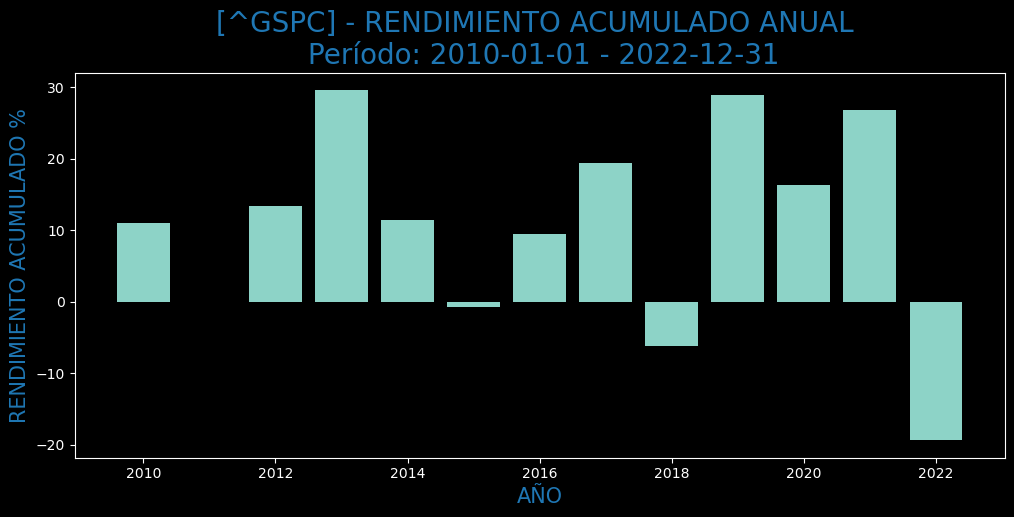

In [5]:
# rends_anuales - output - grafico
grafico

In [6]:
# rends_anuales - output - data
datos

,Rendimiento Acumulado
Año,
2010,11.0
2011,-0.0
2012,13.4
2013,29.6
2014,11.4
2015,-0.7
2016,9.5
2017,19.4
2018,-6.2


In [7]:
df, df_est = meses_favorables(ticker = "^GSPC", tipo = "end", data_from = "2010-01-01", data_to = "2022-12-31", 
                        tipoacum = "promedio", interval = "1mo")

In [8]:
# meses_favorables - output - df_est
df_est

,Rendimiento Promedio
Mes,
7,3.00%
10,2.70%
11,2.40%
4,1.60%
2,1.10%
3,1.00%
1,0.70%
12,0.50%
6,-0.10%


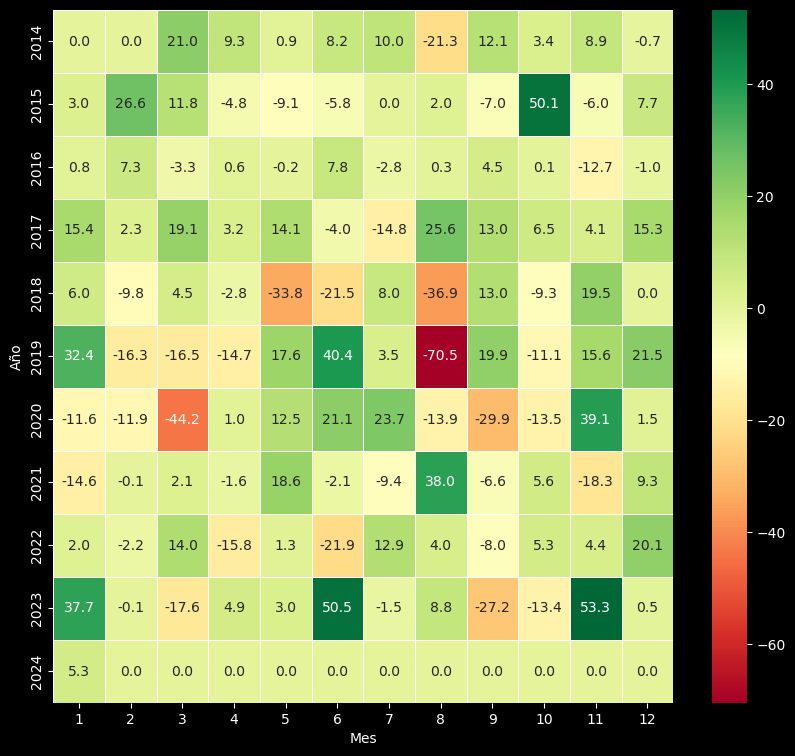

In [9]:
heatmap_estacional("GGAL", tipo = "period", interval = "1mo", period = "10y")